In [1]:
from pycalphad import Database, binplot, calculate, equilibrium, variables as v
from pycalphad.plot.utils import phase_legend
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
%matplotlib inline

In [2]:
dbf = Database('9-element_Jan23.tdb') # Load database and choose the phases that will be plotted
print(dbf.elements) 

{'CR', 'VA', 'W', 'ZR', '/-', 'V', 'NB', 'TI', 'TA', 'MO', 'HF'}


In [10]:
# Your initial set of elements
print(dbf.elements) 

# Elements to be excluded
excluded_elements = {'/-', 'VA'}

# Filter out the excluded elements
filtered_elements = dbf.elements - excluded_elements

# Create combinations of each two elements
element_combinations = list(combinations(filtered_elements, 2))

#element_combinations

# Adding 'VA' to each tuple in element_combinations
element_combinations_with_va = [(combo[0], combo[1], 'VA') for combo in element_combinations]

element_combinations_with_va



{'CR', 'VA', 'W', 'ZR', '/-', 'V', 'NB', 'TI', 'TA', 'MO', 'HF'}


[('CR', 'MO', 'VA'),
 ('CR', 'ZR', 'VA'),
 ('CR', 'V', 'VA'),
 ('CR', 'NB', 'VA'),
 ('CR', 'TI', 'VA'),
 ('CR', 'TA', 'VA'),
 ('CR', 'W', 'VA'),
 ('CR', 'HF', 'VA'),
 ('MO', 'ZR', 'VA'),
 ('MO', 'V', 'VA'),
 ('MO', 'NB', 'VA'),
 ('MO', 'TI', 'VA'),
 ('MO', 'TA', 'VA'),
 ('MO', 'W', 'VA'),
 ('MO', 'HF', 'VA'),
 ('ZR', 'V', 'VA'),
 ('ZR', 'NB', 'VA'),
 ('ZR', 'TI', 'VA'),
 ('ZR', 'TA', 'VA'),
 ('ZR', 'W', 'VA'),
 ('ZR', 'HF', 'VA'),
 ('V', 'NB', 'VA'),
 ('V', 'TI', 'VA'),
 ('V', 'TA', 'VA'),
 ('V', 'W', 'VA'),
 ('V', 'HF', 'VA'),
 ('NB', 'TI', 'VA'),
 ('NB', 'TA', 'VA'),
 ('NB', 'W', 'VA'),
 ('NB', 'HF', 'VA'),
 ('TI', 'TA', 'VA'),
 ('TI', 'W', 'VA'),
 ('TI', 'HF', 'VA'),
 ('TA', 'W', 'VA'),
 ('TA', 'HF', 'VA'),
 ('W', 'HF', 'VA')]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pycalphad/plot/binary/plot.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax = plt.figure().gca()


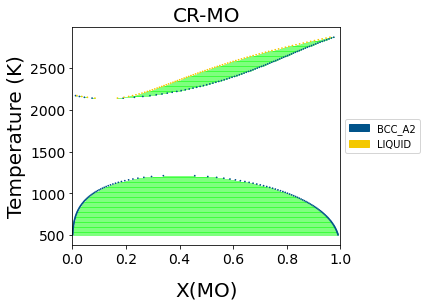

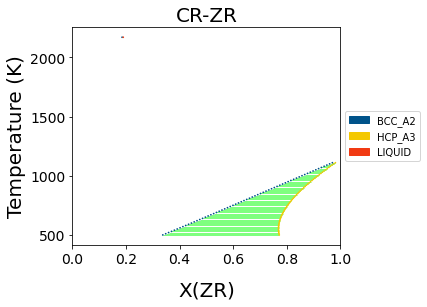

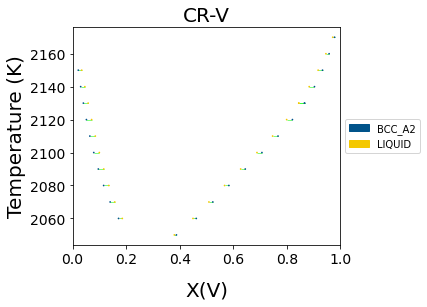

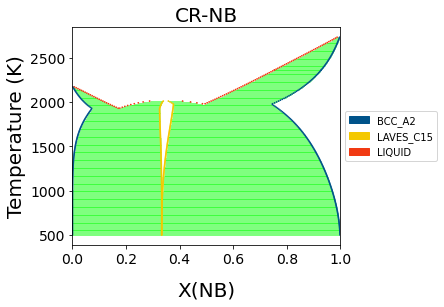

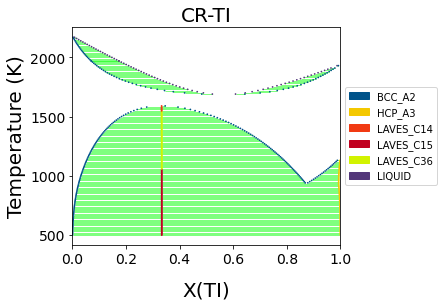

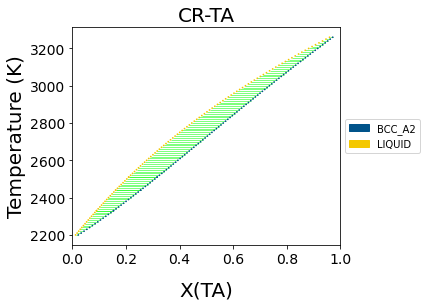

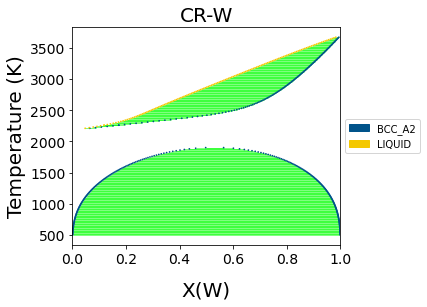

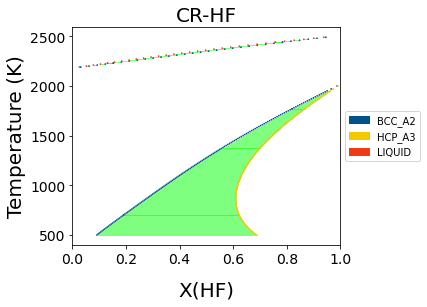

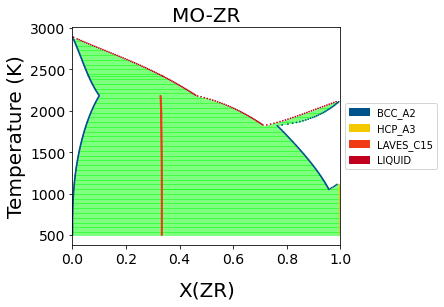

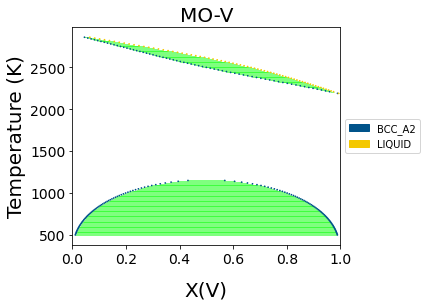

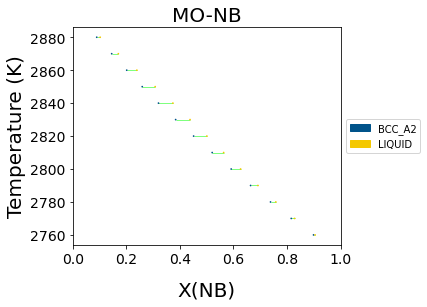

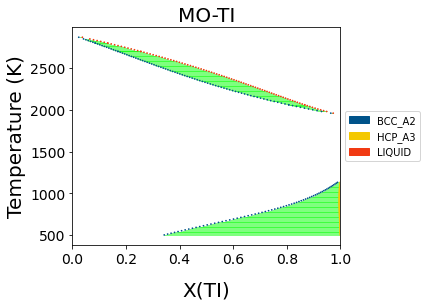

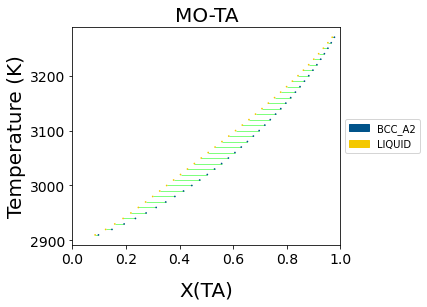

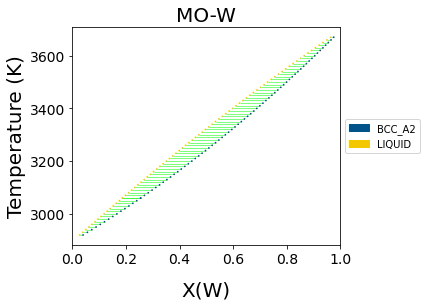

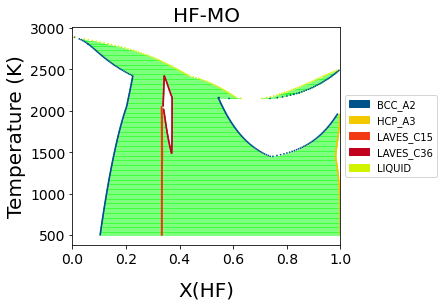

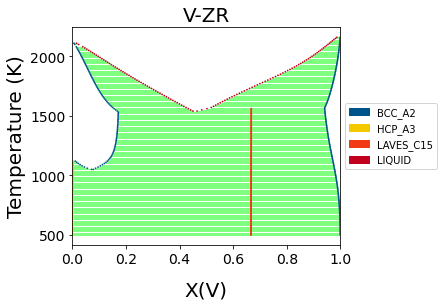

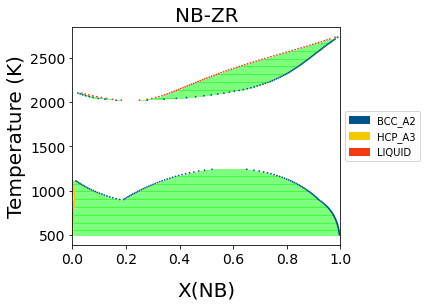

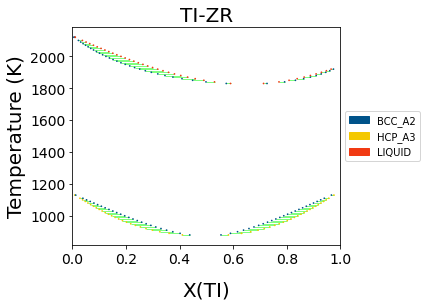

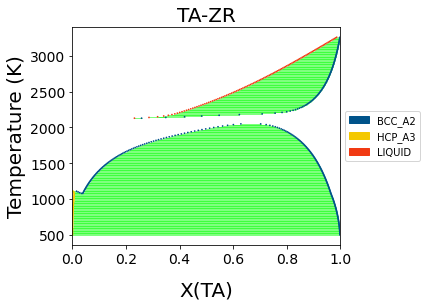

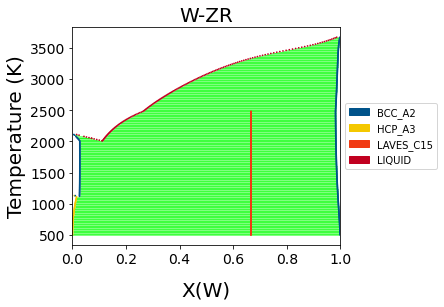

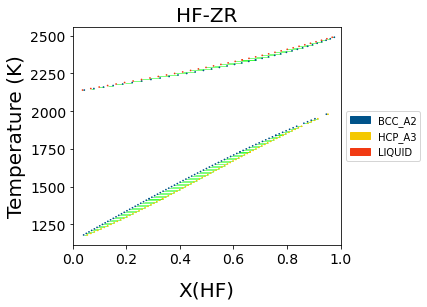

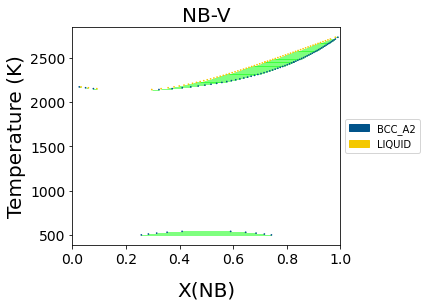

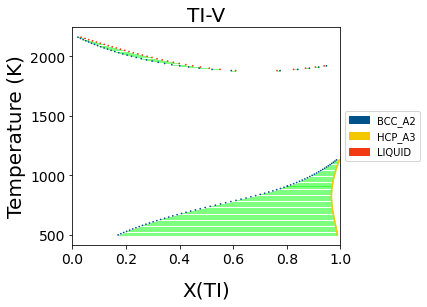

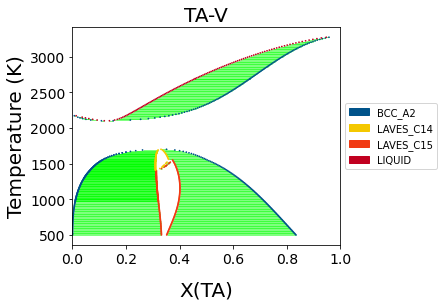

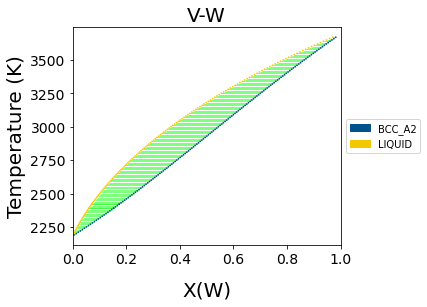

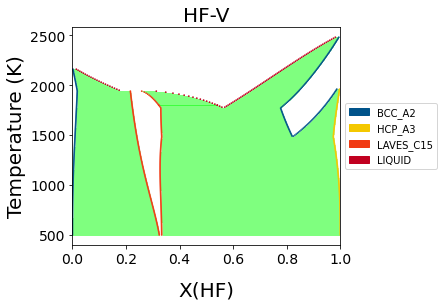

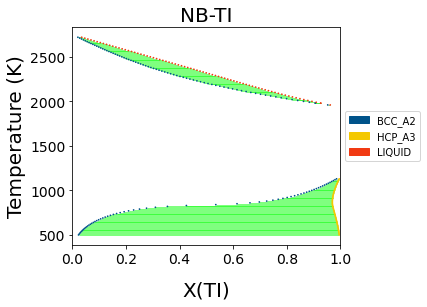

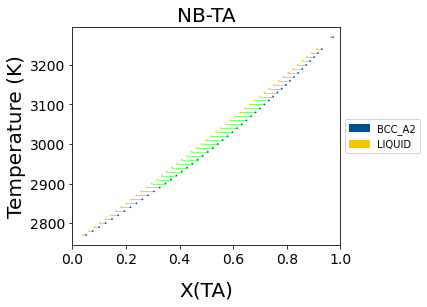

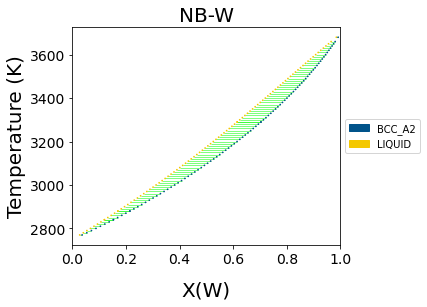

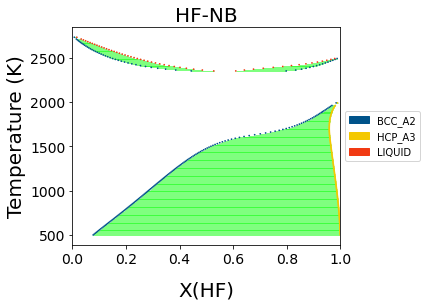

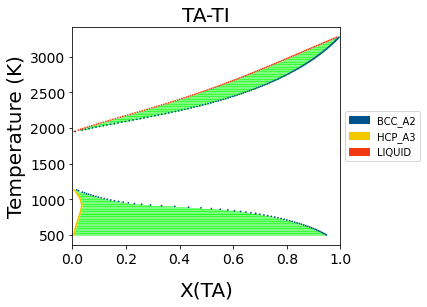

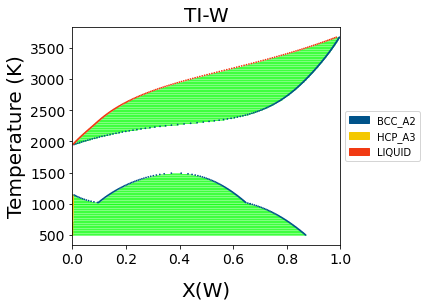

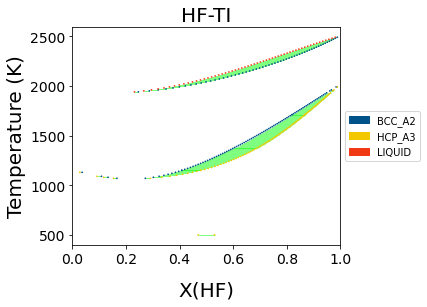

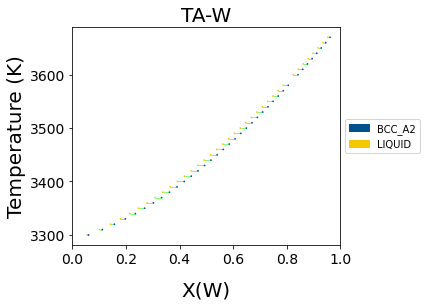

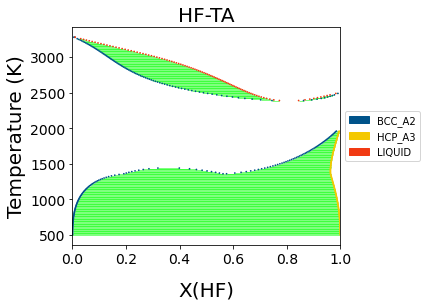

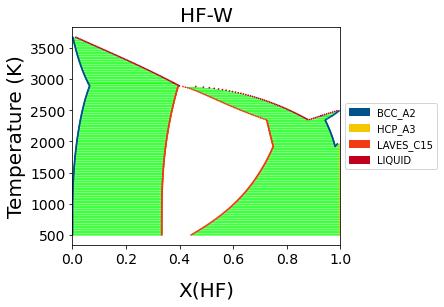

In [11]:
for i in list(element_combinations_with_va):
    comps = list(i)
    #print(comps)
    phases = list(dbf.phases.keys()) # Get all the phases in the database programatically
    conds = {v.N: 1.0, v.P: 101325, v.T: (500, 4000, 10), v.X(comps[1]): (0, 1, 0.01)}# Create the dictionary of conditions
    binplot(dbf, comps, phases, conds) # Plot by passing in all the variables